In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter Plots

Scatter plots can show how different features are related to one another, the main theme between all relational plot types is they display how features are interconnected to each other. There are many different types of plots that can be used to show this, so let's explore the scatterplot() as well as general seaborn parameters applicable to other plot types.

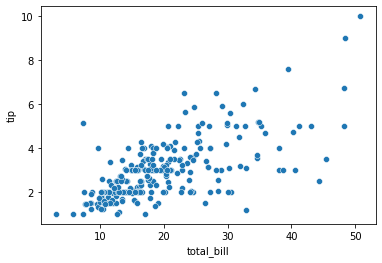

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

# Connecting to Figure in Matplotlib
## Note how matplotlib is still connected to seaborn underneath (even without importing matplotlib.pyplot), since seaborn itself is directly making a Figure call with matplotlib. We can import matplotlib.pyplot and make calls to directly effect the seaborn figure

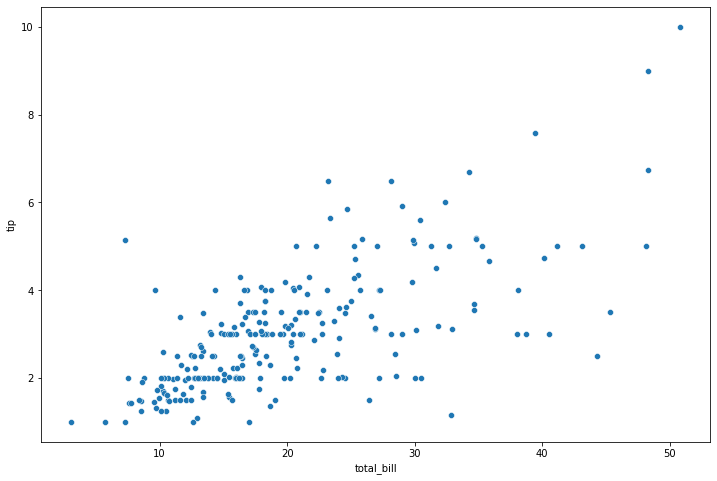

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_bill',y='tip',data=tips)

### hue

Color points based off a categorical feature in the DataFrame

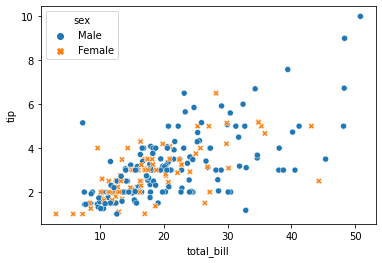

In [ ]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="sex", style="sex")

### size

Allows you to size based on another column 

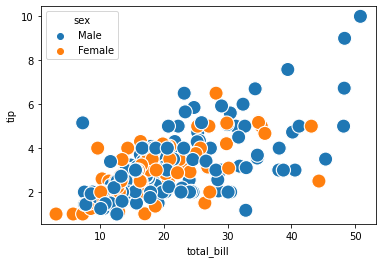

In [ ]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="sex", s=200)

### style

Automatically choose styles based on another categorical feature in the dataset. Optionally use the **markers=** parameter to pass a list of marker choices based off matplotlib, for example: ['*','+','o']

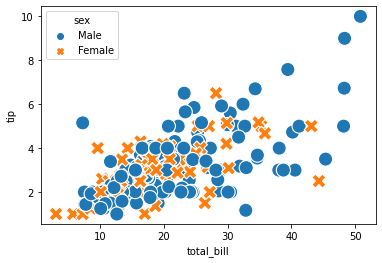

In [ ]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="sex", s=200, style="sex")

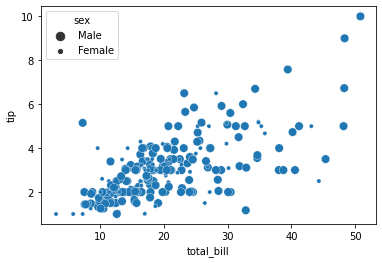

In [ ]:
sns.scatterplot(x='total_bill',y='tip',size="sex", data=tips)

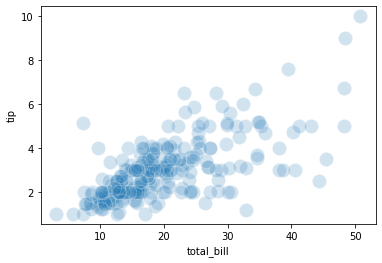

In [ ]:
sns.scatterplot(x='total_bill',y='tip',s=200, data=tips, alpha=0.2)
#sns.scatterplot(x='salary',y='sales',data=df,s=200,linewidth=0,alpha=0.2)

## Exporting (save) a Seaborn Figure 

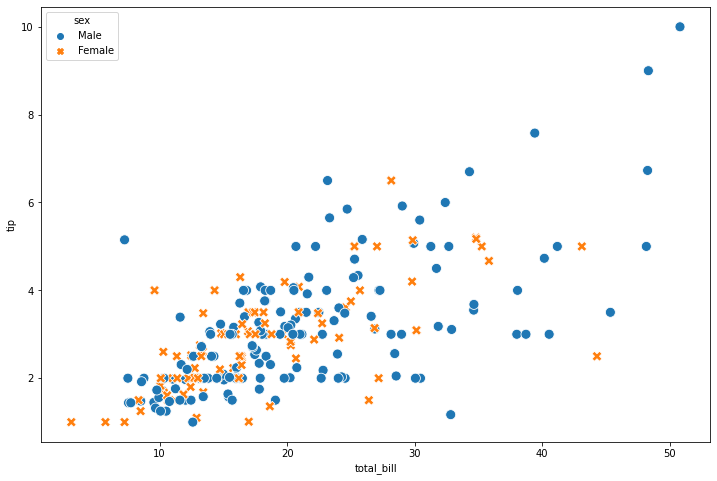

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_bill',y='tip', data=tips,style='sex',hue='sex',s=100)

# Call savefig in the same cell
# plt.savefig('example_scatter.jpg')

# Distribution Plots 
## rugplot


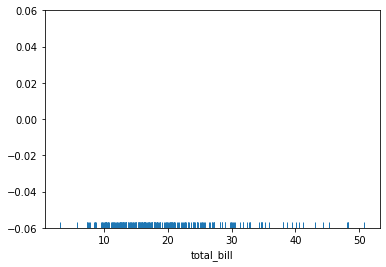

In [ ]:
sns.rugplot(tips['total_bill'])

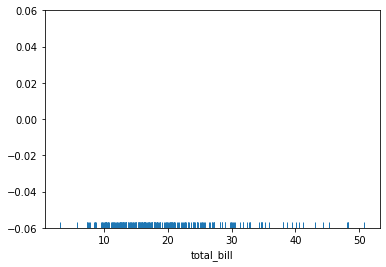

In [ ]:
sns.rugplot(x='total_bill', data=tips)

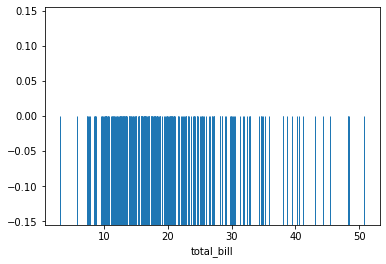

In [ ]:
sns.rugplot(x='total_bill', data=tips,height=0.5)

## displot() and histplot()  
The rugplot itself is not very informative for larger data sets distribution around the mean since so many ticks makes it hard to distinguish one tick from another. Instead we should count the number of tick marks per some segment of the x axis, then construct a histogram from this.

The displot is a plot type that can show you the distribution of a single feature. It is a histogram with the option of adding a "KDE" plot (Kernel Density Estimation) on top of the histogram. Let's explore its use cases and syntax.

## displot()

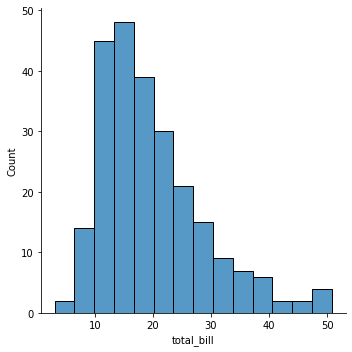

In [ ]:
sns.displot(x='total_bill', data=tips)

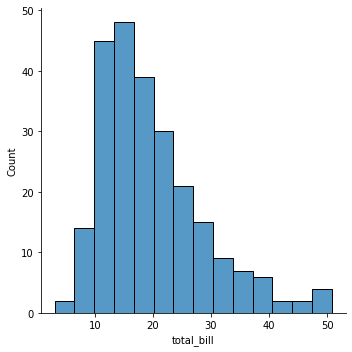

In [ ]:
sns.displot(tips['total_bill']) 

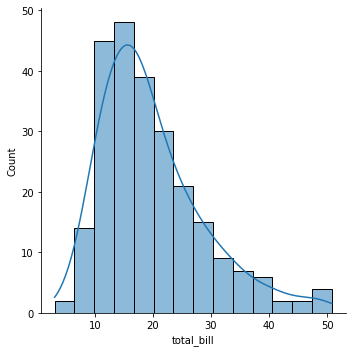

In [ ]:
sns.displot(x='total_bill', data=tips, kde=True)

## histplot()

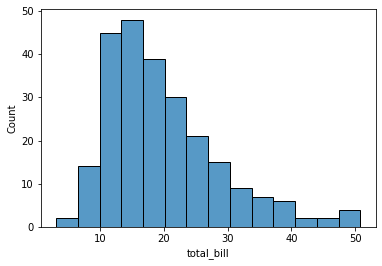

In [ ]:
sns.histplot(data = tips, x = 'total_bill')  

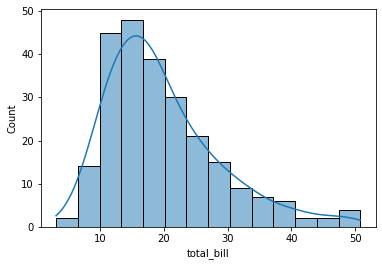

In [ ]:
sns.histplot(tips['total_bill'],kde=True)  

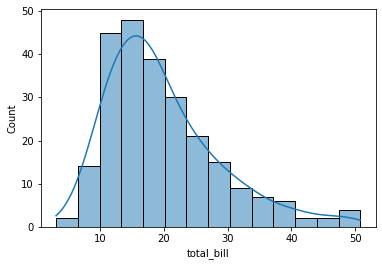

In [ ]:
sns.histplot(data = tips, x = 'total_bill' ,kde=True)  

### histogram Number of Bins

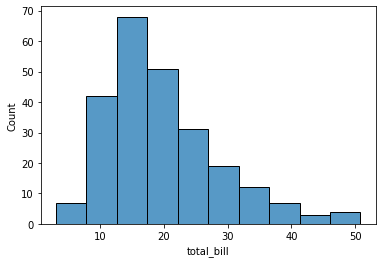

In [ ]:
sns.histplot(data = tips, x = 'total_bill' ,bins=10)  

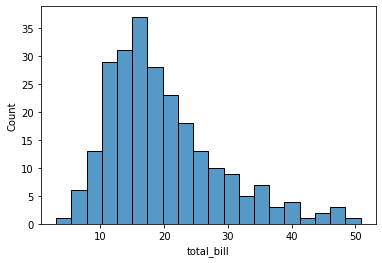

In [ ]:
sns.histplot(data = tips, x = 'total_bill' ,bins=20)  

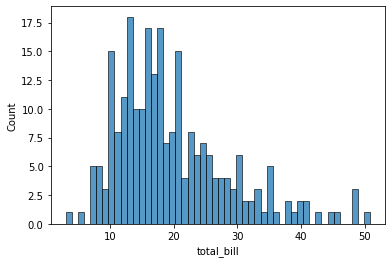

In [ ]:
sns.histplot(data = tips, x = 'total_bill' ,bins=50)  

### Adding in a grid and styles

You can reset to a different default style: one of {darkgrid, whitegrid, dark, white, ticks}.

In a later notebook and lecture we will cover custom styling in a lot more detail.

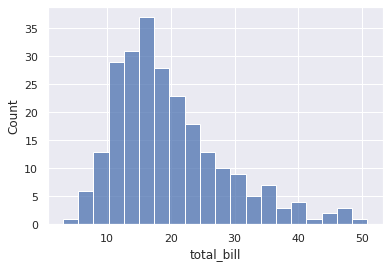

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data = tips, x = 'total_bill',bins=20)

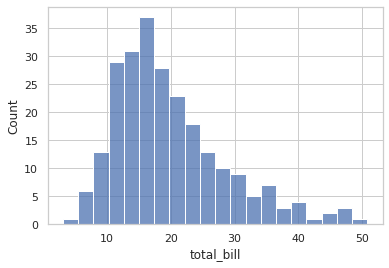

In [ ]:
sns.set(style='whitegrid')
sns.histplot(data = tips, x = 'total_bill',bins=20)

### Adding in keywords from matplotlib

Seaborn plots can accept keyword arguments directly from the matplotlib code that seaborn uses. Keep in mind, not every seaborn plot can accept all matplotlib arguments, but the main styling parameters we've discussed are available. 

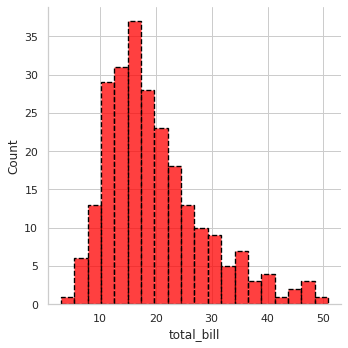

In [ ]:
sns.displot(data = tips, x = 'total_bill',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

## The Kernel Density Estimation Plot

The KDE plot maps an estimate of a probability *density* function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

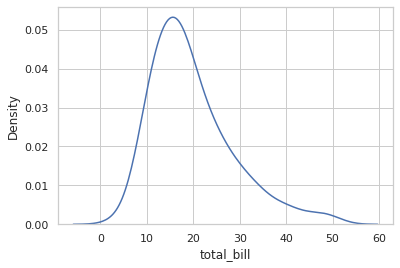

In [ ]:
sns.kdeplot(x='total_bill', data=tips)

### Cut Off KDE

We could cut off the KDE if we know our data has hard limits (no one can be a negative age and no one in the population can be older than 100 for some reason)

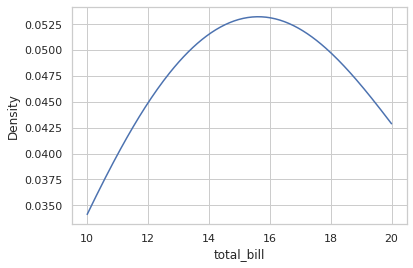

In [ ]:
# plt.figure(figsize=(12,8))
sns.kdeplot(x='total_bill', data=tips,clip=[10,20])

### Bandwidth

As explained in the video, the KDE is constructed through the summation of the kernel (most commonly Gaussian), we can effect the bandwith of this kernel to make the KDE more "sensitive" to the data. Notice how with a smaller bandwith, the kernels don't stretch so wide, meaning we don't need the cut-off anymore. This is analagous to increasing the number of bins in a histogram (making the actual bins narrower).

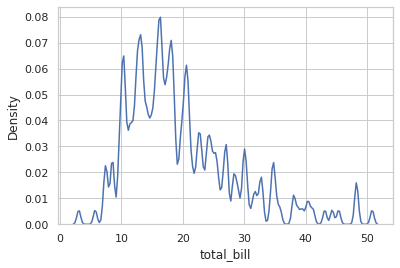

In [ ]:
sns.kdeplot(x='total_bill', data=tips,bw_adjust=0.1)

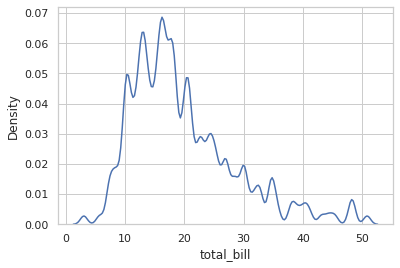

In [ ]:
sns.kdeplot(x='total_bill', data=tips,bw_adjust=0.2)

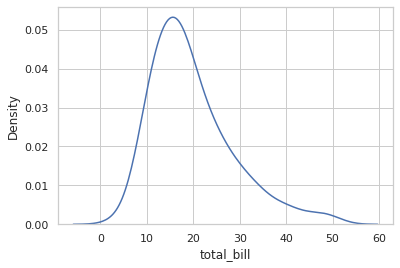

In [ ]:
sns.kdeplot(x='total_bill', data=tips,bw_adjust=1)

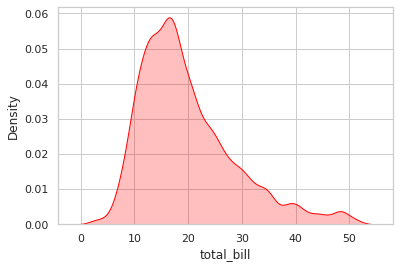

In [ ]:
sns.kdeplot(x='total_bill', data=tips,bw_adjust=0.5,shade=True,color='red')

## 2 Dimensional KDE Plots

We will cover these in more detail later, but just keep in mind you could compare two continuous features and create a 2d KDE plot showing there distributions with the same kdeplot() call. Don't worry about this now, since we will cover it in more detail later when we talk about comparing 2 features against each other in a plot call.

In [ ]:
data = pd.DataFrame(np.random.normal(0,1,size=(100,2)),columns=['x','y'])
data

,x,y
0,0.302665,1.693723
1,-1.706086,-1.159119
2,-0.134841,0.390528
3,0.166905,0.184502
4,0.807706,0.072960
...,...,...
95,-1.549671,0.435253
96,1.259904,-0.447898
97,0.266207,0.412580
98,0.988773,0.513833


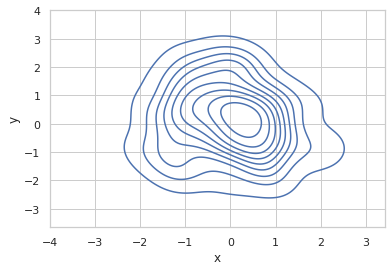

In [ ]:
sns.kdeplot(data= data,x='x',y='y')

# Bonus Code for Visualizations

Below is the code used to create the visualizations shown in the video lecture for an explanation of a KDE plot. We will not cover this code in further detail, since it was only used for the creation of the slides shown in the video.

In [ ]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

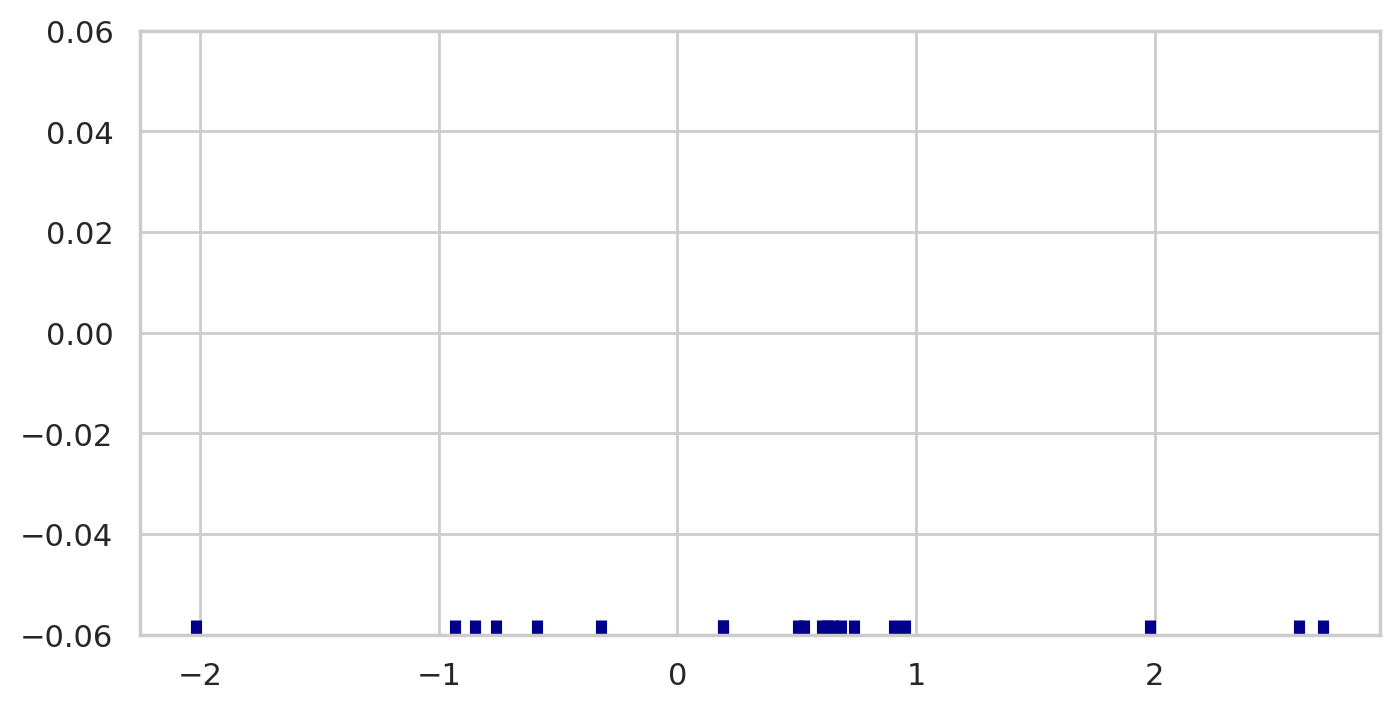

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="darkblue", linewidth=4)

<Figure size 1600x800 with 0 Axes>

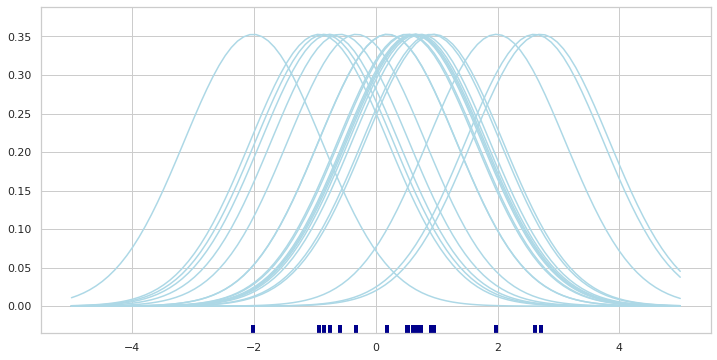

In [ ]:
from scipy import stats

plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

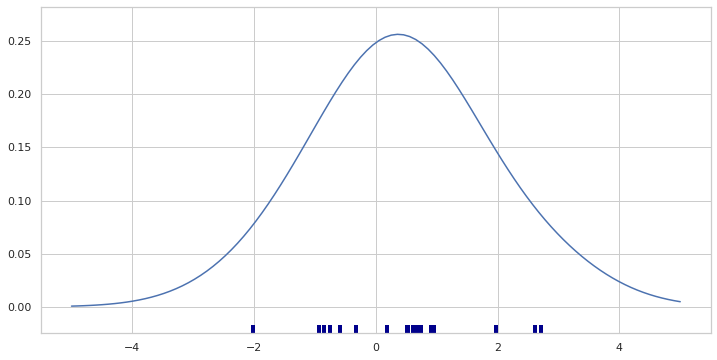

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
from scipy.integrate import trapz
plt.figure(figsize=(12,6))
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4)

<Figure size 1600x800 with 0 Axes>

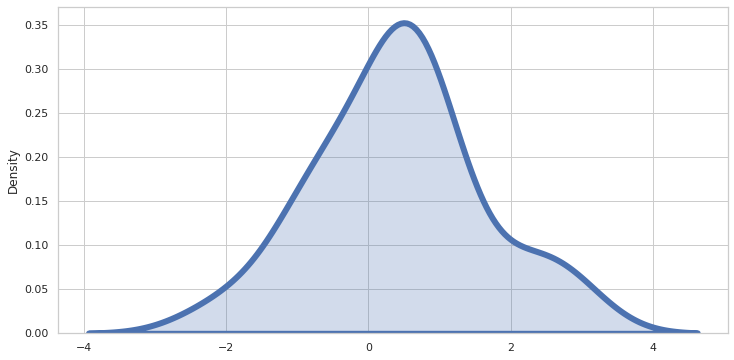

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
#     plt.plot(support, kernel, color="lightblue")

# sns.rugplot(x, color="darkblue", linewidth=4)
sns.kdeplot(x,linewidth=6,shade=True)